# Una implementacion de k-means++

El objetivo de este notebook es implementar el algoritmo de k-means++ segun el paper "Arthur & Vassilvitskii, k-means++_ the advantages of careful seeding", ademas de ello utlizando el dataset "iris" de la librería sklearn, probaremos el accuracy del modelo creado. 

Importamos las librerias necesarias para correr este notebook.

In [1]:
from kmeans_pp import Kmeans
from sklearn import datasets
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

Función para calcular la suma de los errores cuadraticos de cada Época

In [4]:
def print_SSE(sse):
    print("Kmeans Sum of Square Error of each epoch:")
    for i in range(len(sse)):
        print("epoch %3d: %8.3f"%(i, sse[i]))
    print("Kmeans Final Sum of Square Error:")
    print(sse[-1])

### Testeamos nuestro modelo de Kmeans 

In [5]:
kmeans = Kmeans(K=3, max_iter=100, init='kmeans', seed=123123)
kmeans.fit(X)
print_SSE(kmeans.SSE)
y_pred = kmeans.labels

Kmeans Sum of Square Error of each epoch:
epoch   0:  146.400
epoch   1:   88.490
epoch   2:   81.332
epoch   3:   79.197
epoch   4:   78.851
Kmeans Final Sum of Square Error:
78.85144142614601


### Testeamos nuestro modelo de Kmeans++

In [6]:
kmeans = Kmeans(K=3, max_iter=20, init='kmeans++', seed=123123)
kmeans.fit(X)
print_SSE(kmeans.SSE)
y_pred_pp = kmeans.labels

Kmeans Sum of Square Error of each epoch:
epoch   0:  194.220
epoch   1:  100.736
epoch   2:   88.268
epoch   3:   80.830
epoch   4:   79.197
epoch   5:   78.851
Kmeans Final Sum of Square Error:
78.85144142614601


Realizamos algunos cambios a los labels obtenidos para calcular correctamente el accuracy

In [7]:
for i in range(150):
    if y_pred[i,] == 2:
        y_pred[i,] = 0
    elif y_pred[i,] == 0:
        y_pred[i,] = 2
    elif y_pred[i,] == 1:
        y_pred[i,] = 1

In [8]:
for i in range(150):
    if y_pred_pp[i,] == 2:
        y_pred_pp[i,] = 0
    elif y_pred_pp[i,] == 0:
        y_pred_pp[i,] = 1
    elif y_pred_pp[i,] == 1:
        y_pred_pp[i,] = 2

Implementamos el algoritmo de sklearn

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=123123, init='k-means++').fit(X)
y_pred_sk = kmeans.labels_

In [10]:
for i in range(150):
    if y_pred_sk[i,] == 0:
        y_pred_sk[i,] = 1
    elif y_pred_sk[i,] == 1:
        y_pred_sk[i,] = 0
    elif y_pred_sk[i,] == 2:
        y_pred_sk[i,] = 2

Calculamos el accuracy obtenido por nuestro modelo y el obtenido usando la librería Scikit Learn

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy for  my kmeans:',accuracy_score(Y, y_pred))
print('Accuracy for  my kmeans++:', accuracy_score(Y, y_pred_pp))
print('Accuracy for  sklearn kmeans++:', accuracy_score(Y, y_pred_sk))

Accuracy for  my kmeans: 0.8933333333333333
Accuracy for  my kmeans++: 0.8933333333333333
Accuracy for  sklearn kmeans++: 0.8933333333333333


Text(0.04, 0.5, 'Sepal width')

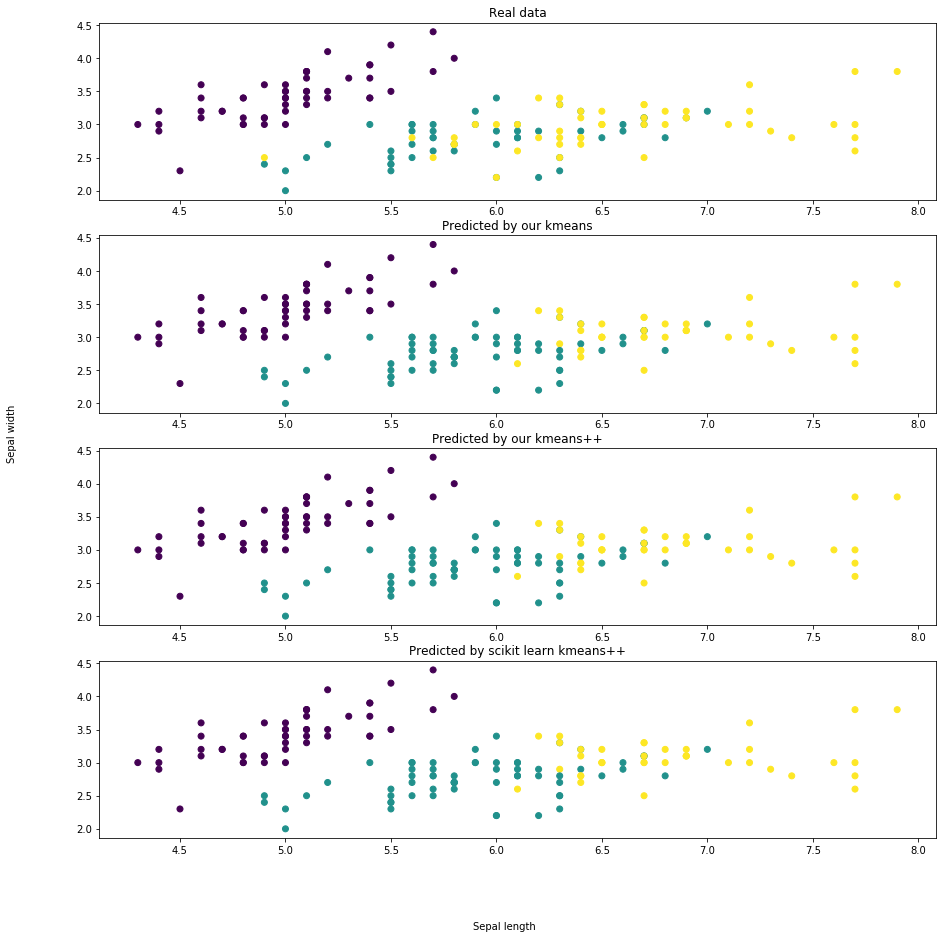

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 15))   

ax1.scatter(X[:, 0], X[:, 1], c=Y)
ax1.set_title('Real data')
ax2.scatter(X[:, 0], X[:, 1], c=y_pred)
ax2.set_title('Predicted by our kmeans')
ax3.scatter(X[:, 0], X[:, 1], c=y_pred_pp)
ax3.set_title('Predicted by our kmeans++')
ax4.scatter(X[:, 0], X[:, 1], c=y_pred_sk)
ax4.set_title('Predicted by scikit learn kmeans++')

fig.text(0.5, 0.04, 'Sepal length', ha='center')
fig.text(0.04, 0.5, 'Sepal width', va='center', rotation='vertical')

## Respuestas:

1. El codigo generado puede optimizarse en multiples maneras, debajo se citan algunas:
    * Python es un gran lenguaje pero a la hora de realizar operaciones en for loops por ejemplo puede tomas mayor cantidad de tiempo comparado a otros lenguajes de bajo nivel. Puede ser un punto a ser optimizado.
    * Ademas de ello en algunos momentos el uso de memoria puede ser mayor al realmente necesario para contener solo algunos arreglos temporales.
    * Una optimización interesante para lograr mayor escalabilidad puede ser la propuesta por Bahman Bahmani, Benjamin Moseley, Andrea Vattani, Ravi Kumar y Sergei Vassilvitskii ([link](http://vldb.org/pvldb/vol5/p622_bahmanbahmani_vldb2012.pdf)) donde lo que se intenta es atacar la secuencialidad inherente en el metodo para lograr aplicarlo a grandes volumenes de datos. Entiendo esta seria una version paralelizable de K-means++.

2. Las ventajas principales de K-means++ tal como se explicita en el paper provisto, radican en su velocidad de convergencia y accuracy respecto al algoritmo K-means original.